# Final Project: ScreenTime Analysis (Linear Regression)

This project will be analyzing some phone screentime app data from Kaggle.
The data contains the following fields:

*Date: Date of the record (String)

*Usage: Number of times the user used the smartphone in a day (Integer)

*Notifications: Number of notifications the user received in a day (Integer)

*Times opened: Number of times the app was opened by the user (Integer)

*App: The app that was opened by the user (String)



I am aiming to predict the amount of time users spend on the app based on various features such as the number of times the app is opened and the number of notifications received. 

My goal is to develop a model that accurately predicts app usage, helping me understand the factors that contribute to increased or decreased usage.

Analyzing the screen time of a user helps smartphone companies give a review of all the activities of the user on their smartphone. 
It helps users understand if they were productive, creative, or wasted their time.

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Explore Data 

In [4]:
screen = pd.read_csv('Screentime-App-Details-Dataset.csv')
screen

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram
5,08/31/2022,19,25,20,Instagram
6,09/01/2022,44,23,57,Instagram
7,09/02/2022,16,28,22,Instagram
8,09/03/2022,27,15,25,Instagram
9,09/04/2022,72,29,30,Instagram


Now, check the head(), info() and describe().

In [5]:
screen.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


In [6]:
screen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [7]:
screen.describe()

,Usage,Notifications,Times opened
count,54.000000,54.000000,54.000000
mean,65.037037,117.703704,61.481481
std,58.317272,97.017530,43.836635
min,1.000000,8.000000,2.000000
25%,17.500000,25.750000,23.500000
50%,58.500000,99.000000,62.500000
75%,90.500000,188.250000,90.000000
max,244.000000,405.000000,192.000000


# Checking Missing Data

Let's first check for any missing data before exploring.

In [8]:
screen.isnull()

,Date,Usage,Notifications,Times opened,App
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


# Data Analysis & Visualization

There are no null values, so let's visualize the data.

In [9]:
screen['Usage'].value_counts()

3      3
2      3
71     3
38     2
64     2
19     2
69     2
1      2
160    1
23     1
76     1
6      1
126    1
91     1
203    1
119    1
103    1
128    1
182    1
50     1
212    1
244    1
77     1
58     1
108    1
82     1
59     1
43     1
14     1
44     1
16     1
27     1
72     1
42     1
45     1
130    1
94     1
114    1
17     1
4      1
5      1
39     1
89     1
Name: Usage, dtype: int64

Use seaborn to create a jointplot to compare the Times opened and Notifications columns. 

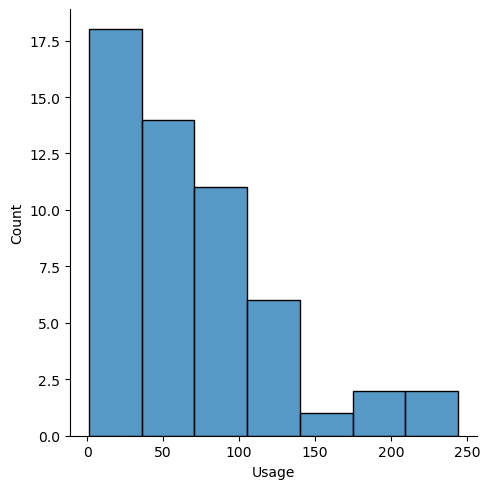

In [10]:
sns.displot(screen['Usage'])

Check the correlation and create a heatmap.

In [11]:
corr = screen.corr()
corr

/var/folders/6s/fnynnh1n6nj6cz2rtx8mgnrh0000gn/T/ipykernel_1241/4274283064.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = screen.corr()


,Usage,Notifications,Times opened
Usage,1.000000,0.774452,0.816409
Notifications,0.774452,1.000000,0.882983
Times opened,0.816409,0.882983,1.000000


<Axes: >

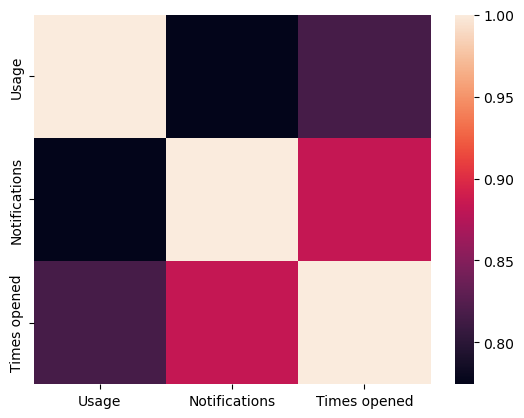

In [12]:
sns.heatmap(corr)

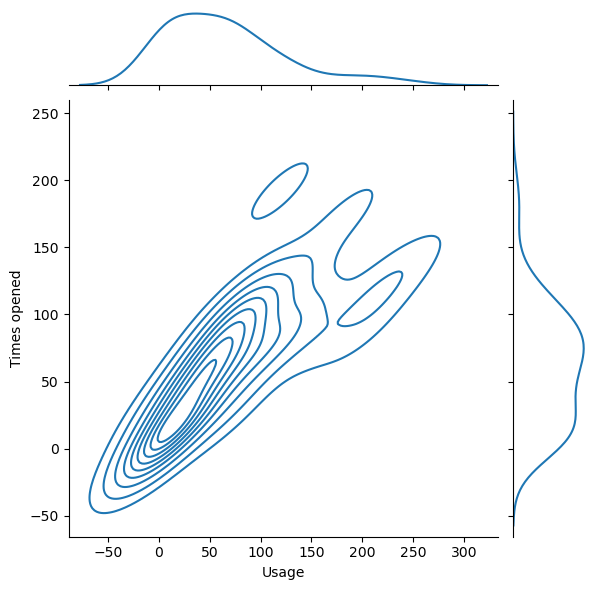

In [13]:
sns.jointplot(x='Usage', y='Times opened', data=screen, kind='kde')

Plot pairwise relationships for the dataframe with Times opened, Usage, and Notifications (numerical features) against the App (categorical column).

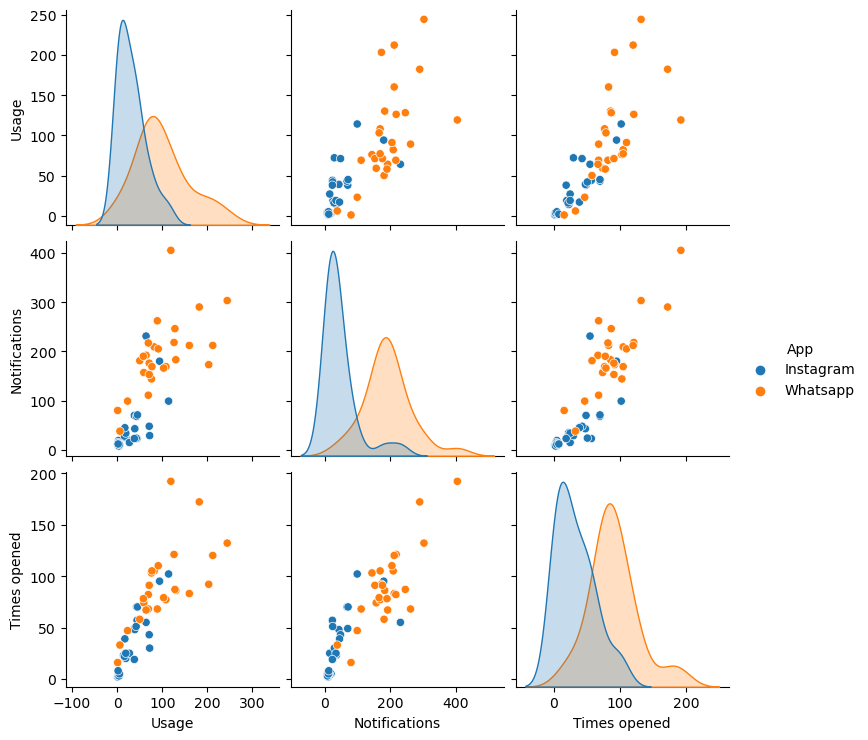

In [14]:
sns.pairplot(screen, hue='App')

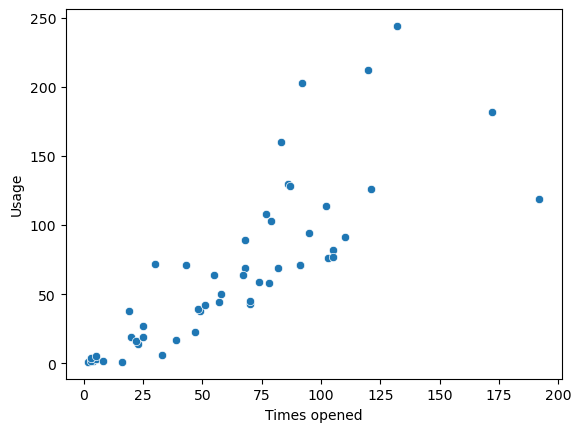

In [15]:
# scatter plot for two columns
sns.scatterplot(x='Times opened', y='Usage', data=screen)
plt.show()

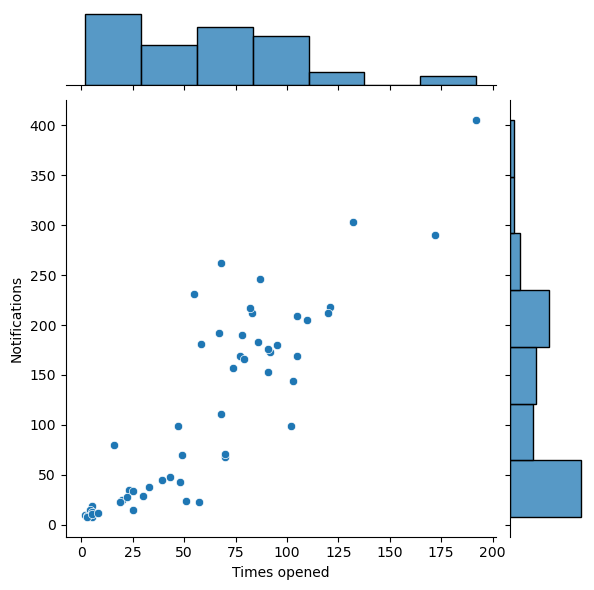

In [16]:
sns.jointplot(x='Times opened', y='Notifications', data=screen)

** Use jointplot to create a 2D hex bin plot comparing Times opened and  Usage.**

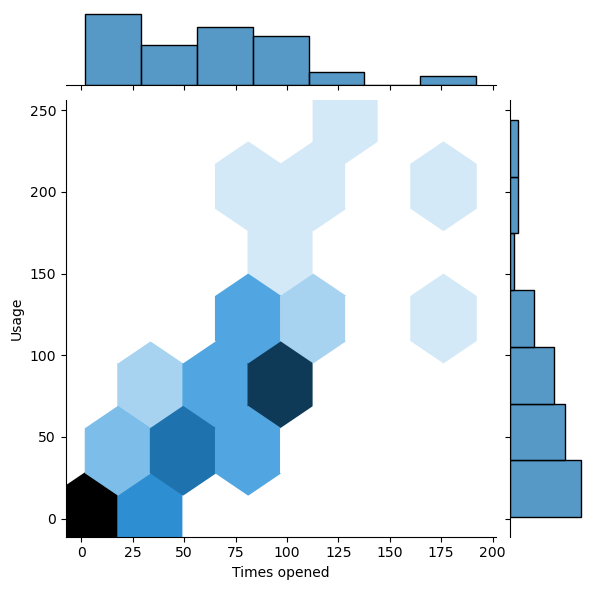

In [17]:
sns.jointplot(x='Times opened', y='Usage', data=screen, kind='hex')

We can explore these types of relationships across the entire data set. 

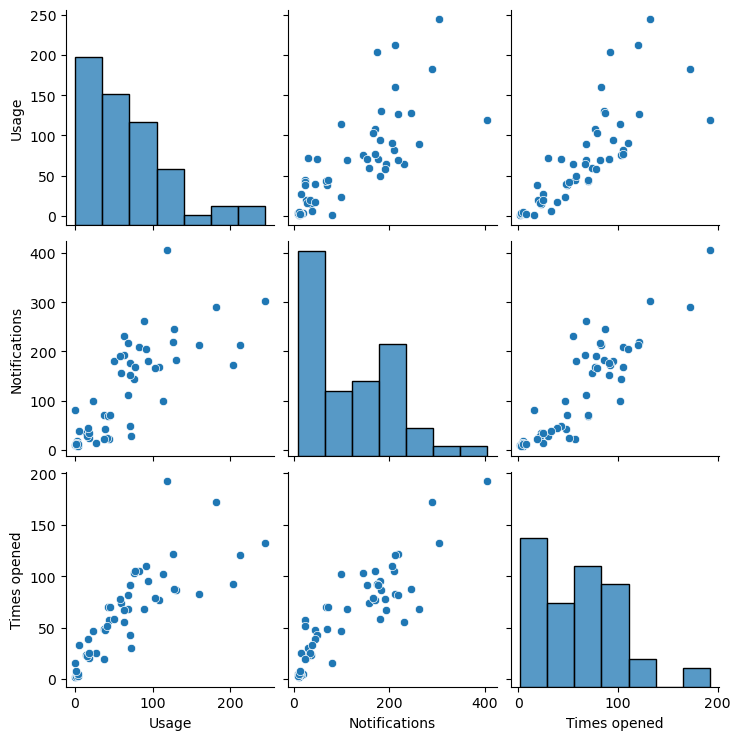

In [18]:
sns.pairplot(screen)

We can use linear plots and split plots up based off features and color based on the hue, which will be the app

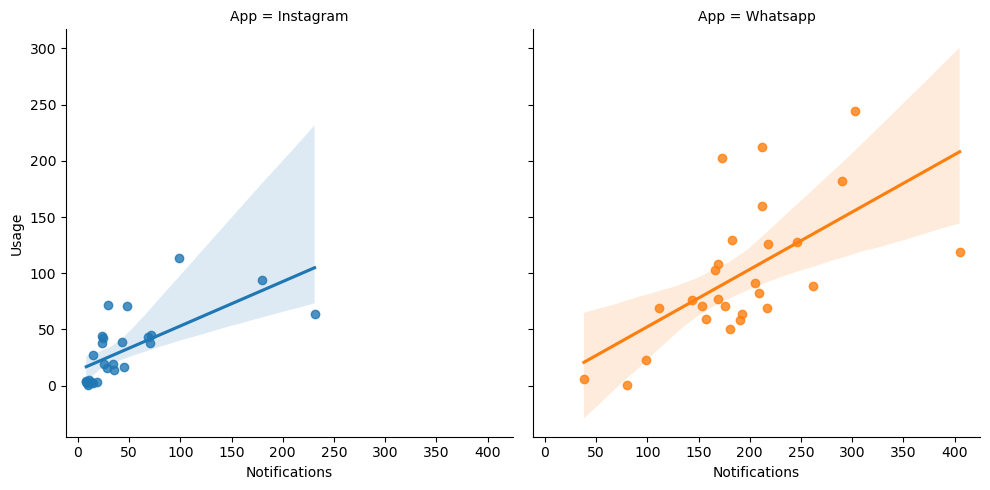

In [19]:
sns.lmplot(x='Notifications', y='Usage', data=screen, hue='App', col='App')

# Data Cleaning 

We need to clean the data before using it to train and test our model!

<Axes: >

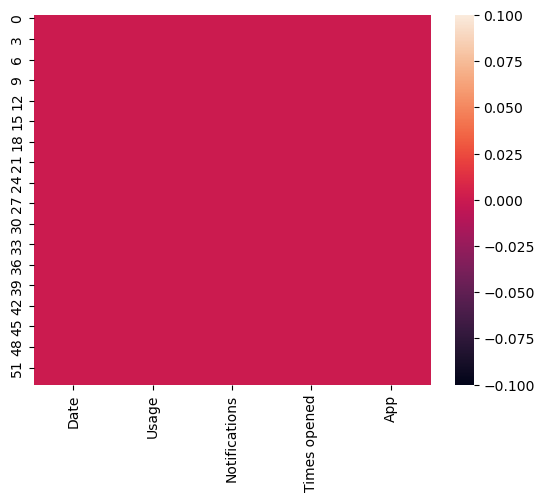

In [20]:
sns.heatmap(screen.isnull())

In [21]:
screen.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


# Converting Categorical Features

We can convert the features that aren't already numerical values.

In [22]:
converted = pd.get_dummies(screen['App'], drop_first=True)
converted

,Whatsapp
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [23]:
screen.drop('App',axis=1,inplace=True)
screen

,Date,Usage,Notifications,Times opened
0,08/26/2022,38,70,49
1,08/27/2022,39,43,48
2,08/28/2022,64,231,55
3,08/29/2022,14,35,23
4,08/30/2022,3,19,5
5,08/31/2022,19,25,20
6,09/01/2022,44,23,57
7,09/02/2022,16,28,22
8,09/03/2022,27,15,25
9,09/04/2022,72,29,30


# Train the Model

In [24]:
screen.columns

Index(['Date', 'Usage', 'Notifications', 'Times opened'], dtype='object')

Identify the input and output model.

In [25]:
y = screen['Usage'] #Target - what to predict (output)
X = screen[['Times opened',
       'Notifications']] #Features - attributes to make predictions (input)

We'll use model_selection.train_test_split from sklearn to split the data into training and testing sets. 
Set test_size=0.3 and random_state=101

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3,random_state=101) 

# Test the Model

Since the data is mostly quantitative, we'll use Linear Regression to test the model.

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm =  LinearRegression()

In [30]:
lm.fit(X_train,y_train) #checking if the model can accurately predict 'Usage' values on new data based on its training. 

LinearRegression()

# Predictions

In [31]:
predict = lm.predict(X_test) 

We'll create a scatterplot of the real test values versus the predicted values.

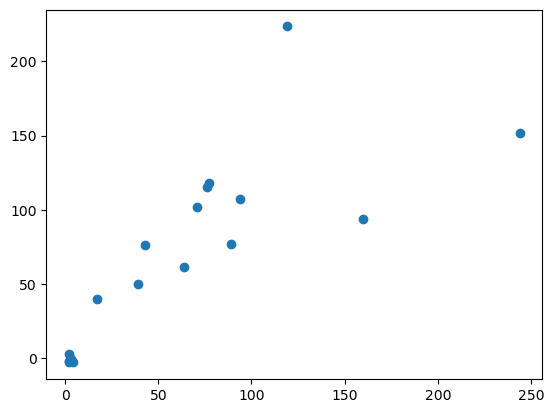

In [32]:
plt.scatter(y_test,predict) 

# Residuals

Use residuals to check the data using seaborn displot().
We'll plot a histogram of the residuals and check if it is normally distributed.

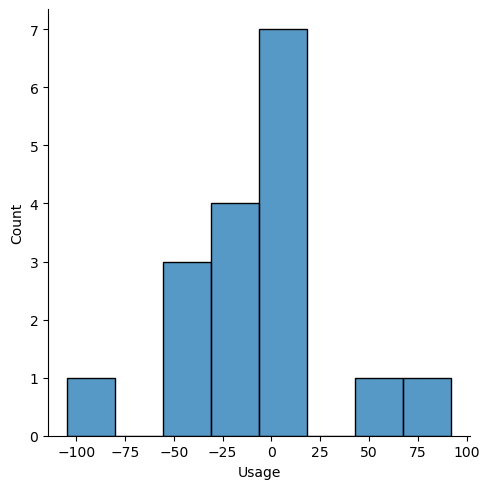

In [33]:
sns.displot(y_test-predict) 

# Regression Evalution Metrics

We will evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2).
We need to calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 

In [34]:
#import metrics
from sklearn import metrics

In [35]:
mae = metrics.mean_absolute_error(y_test,predict)
print("MAE: ",mae) 

MAE:  28.73912970490001


In [36]:
mse = metrics.mean_squared_error(y_test,predict)
print("ME: ",mse)

ME:  1774.2010277273753


In [37]:
rmse = np.sqrt(mse)
print("RMSE: ",rmse)

RMSE:  42.12126574222783


# Conclusion

We can see below that 'Times opened' has a better correlation with 'Usage'.

In [38]:
coeff_screen = pd.DataFrame(lm.coef_, X.columns,columns=['Coefficient'])
coeff_screen

,Coefficient
Times opened,1.161060
Notifications,0.017519


In [39]:
lm.intercept_

-6.444756597130336